# Linear Regression

Linear regression is a method for predicting supervised type data. In contrast to classification, predictions in regression produce values that are close to actual. There are several types of regression, namely linear and non linear regression. In linear regression there are linear simple and linear multiple. In this case the housing price dataset is given, namely the characteristics of the house along with the price that will be predicted with simple and multiple linear regression and the results of the two predictions will be analyzed.

## Initiation of Library, Functions and Data Used

The library used to create models in linear regression is skarn and pandas for reading data. The initialized function is adjusted R which functions to add up the actual and predicted values into a single measure of predictive power. The data used is kc_house_data which is a housing price dataset. An evaluation table is created to measure errors in target predictions with the following function.

### Root Mean Square Error

Root Mean Square Error (RMSE) is a measure often used for the difference between the value predicted by a model and the actual value observed from the environment being modeled. Root Mean Square Error functions to add them into a single measure of predictive power. Root Mean Square Error measures how many errors exist between two data sets. In other words, Root Mean Square Error compares the predicted value and the observed or known value.

### R- Squared
R-squared is a statistical measure of how close the data is to the right regression line. R-suared is known as the coefficient of determination, or the coefficient of determination for multiple regression.

### Adjusted R-Squared

Adjusted R-squared that is adjusted compares the descriptive strength of the regression model - two or more variables - which include a variety of independent variables - known as predictors. Adjusted R-squared adjusted compensates for the addition of variables and only increases if new predictors improve the model above what will be obtained with probability. On the contrary, it will decrease when the predictors improve the model less than what was expected by chance.

In [12]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)


evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,2759800110,20141031T000000,485000.0,3,2.50,1840,8250,1.0,0,1,...,8,1340,500,1958,0,98177,47.7767,-122.378,1970.0,7920.0
3161,579000096,20141010T000000,780000.0,3,1.50,1620,7500,1.0,0,2,...,8,1620,0,1949,0,98117,47.7014,-122.381,2440.0,7800.0
3162,9169600096,20140801T000000,720000.0,2,1.50,1840,9000,1.0,0,2,...,8,1340,500,1957,0,98136,47.5281,-122.388,1880.0,7560.0
3163,1226059112,20150220T000000,415000.0,3,1.00,1360,73616,1.0,0,0,...,7,1360,0,1971,0,98072,47.7528,-122.119,2040.0,50965.0


### Fill in the blank data
An empty dataset, in the sqft_living15 and sqft_lot15 columns, will be filled by the median or middle value of the column.

In [13]:
df['sqft_living15']=df['sqft_living15'].fillna(df['sqft_living15'].median())
df['sqft_lot15']=df['sqft_lot15'].fillna(df['sqft_lot15'].median())

## Modeling
In making models in simple linear regression there are a number of initial steps, namely,
### Split data
The dataset consisting of 3165 rows will be divided into data train and test data with a percentage of 80% train and 20% test.
### Make a model train
Using the LinearRegression library, the model is stored in the lr variable which is then matched with the X_train and y_train parameters. X_train here is obtained from the data train table with sqft_living column while y_train which is the target is obtained from the price column
### Predict test data
The model that was created based on the data train was used to predict test data with X_test as a parameter obtained from the sqft_living column test data table. Whereas y_test is used to calculate the accuracy of the test data prediction.
### Counting errors
Errors are calculated using the Root Mean Square Error (RMSE), R-Squared, and 5 fold Cross Validation where RMSE is the average error, the smaller the better. Whereas R-Squared and 5 Fold Cross Validation will get better if the value is close to 1.

In [14]:
train_data,test_data = train_test_split(df,train_size = 0.8,random_state=3)

lr = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'], dtype=pd.Series)

pred = lr.predict(X_test)
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))

print ("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))


evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression',"-",rmsesm,rtrsm,"-",rtesm,"-",cv]
evaluation


Average Price for Test Data: 538370.828
Intercept: -70818.19453809236
Coefficient: [293.65091608]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,263614.914,0.494,-,0.508,-,0.496


### Plotting data with prediction lines

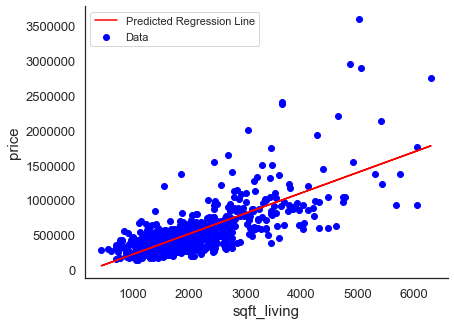

In [15]:
sns.set(style="white", font_scale=1)
plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='blue',label="Data")
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("sqft_living", fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

### Plotting Prediction and Actual Data Simple Regression

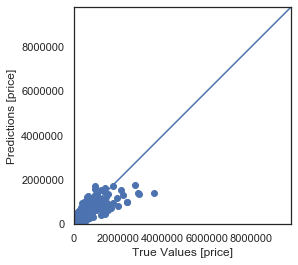

In [16]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, pred)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
lims = [-10000, 9800000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

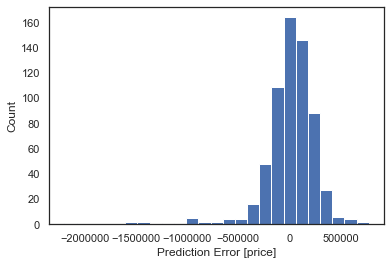

In [17]:
error = pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [price]")
_ = plt.ylabel("Count")

### Multiple Linear Regression
In Multiple Linear Regression, all features / columns in the dataset are used to build training models. With the same stage as simple linear regression, the R-Squared accuracy value increased from 0.5 to 0.7 and RMSE also decreased.

In [18]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
rmsecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(complex_model_3,df[features],df['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression','all features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 5283663.871427854
Coefficients: [-3.92048798e+04  4.48113249e+04  1.12558190e+02  1.22999793e-01
 -3.09944067e+02  8.54420968e+05  5.79313130e+04  2.44237207e+04
  8.56202649e+04  7.29837716e+01  3.95744191e+01 -2.83937343e+03
  1.39926223e+00 -5.01500581e+02  5.84068969e+05 -1.72560866e+05
  3.40879736e+01 -3.05225850e-01]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Multiple Regression,all features,197437.272,0.717,0.715,0.724,0.717,0.710
0,Simple Linear Regression,-,263614.914,0.494,-,0.508,-,0.496


### Plotting Predictions and Actual Data for Multiple Regression

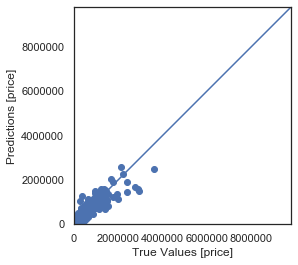

In [19]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, pred)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
lims = [-10000, 9800000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

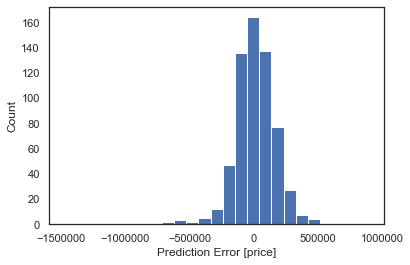

In [20]:
error = pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [price]")
_ = plt.ylabel("Count")

## Conclusion Analysis
Based on the data that has been obtained from these experiments, it can be concluded that the features / columns taken to make the training model are very significant influence on the accuracy obtained. So it is highly recommended when training the model to pay attention to which attributes are informative.